<a href="https://colab.research.google.com/github/stevejj4/Global-AI-Job-Market-Trends-Salary-Insights-2025/blob/main/ai_job_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth #Authorizing google colab
auth.authenticate_user()
import gspread #credentials for google sheet
from google.auth import default
creds,_ = default()
gc = gspread.authorize(creds) #Authorizing the connection
import pandas as pd
worksheet = gc.open('ai_job_dataset').sheet1 #defining the worksheet
rows = worksheet.get_all_values() #getting all values in list of row
df = pd.DataFrame(rows)
df.columns = df.iloc[0] #creating columns name
df = df.iloc[1:]

In [ ]:
#columns available
df.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object', name=0)

In [ ]:
#AI job value chain
#How many job titles are we studying?
#Arrange from high to low
df['job_title'].value_counts()


,count
job_title,
Machine Learning Researcher,808
AI Software Engineer,784
Autonomous Systems Engineer,777
Machine Learning Engineer,772
AI Architect,771
Head of AI,765
NLP Engineer,762
Robotics Engineer,759
Data Analyst,759


In [ ]:
# average salary per job_title
df['salary_usd'] = pd.to_numeric(df['salary_usd'], errors='coerce')
df.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False)

,salary_usd
job_title,
AI Specialist,120570.758242
Machine Learning Engineer,118827.919689
Head of AI,118542.968627
AI Research Scientist,117897.925926
AI Architect,117436.513619
Robotics Engineer,116470.793149
Principal Data Scientist,116305.219346
Research Scientist,116066.502695
Data Engineer,115970.720961


<Axes: ylabel='proportion'>

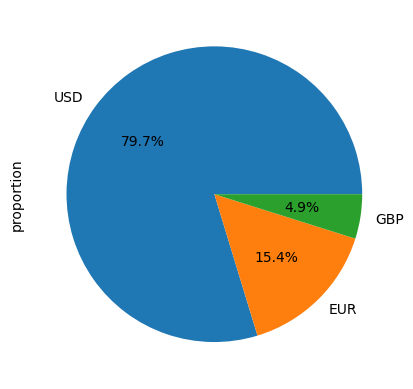

In [ ]:
#an analysis on currency in percentage in dp
#visualization using a pie chart
df['salary_currency'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')

In [ ]:
#salary analysis based on experince_level
df.groupby('experience_level')['salary_usd'].mean().sort_values(ascending=False)


,salary_usd
experience_level,
EX,187723.647340
SE,122187.657845
MI,87955.471833
EN,63133.377084


In [ ]:
# how employment_type is affected with job title of vice versa
# Calculate the counts of each employment type for each job title
employment_counts = df.groupby(['job_title', 'employment_type']).size().unstack(fill_value=0)

# Calculate the percentage of each employment type within each job title
employment_percentages = employment_counts.apply(lambda x: x / x.sum(), axis=1)

# Display the result
display(employment_percentages)

employment_type,CT,FL,FT,PT
job_title,,,,
AI Architect,0.226978,0.229572,0.287938,0.255512
AI Consultant,0.255682,0.261364,0.237216,0.245739
AI Product Manager,0.244953,0.243607,0.259758,0.251682
AI Research Scientist,0.252646,0.260582,0.250000,0.236772
AI Software Engineer,0.241071,0.262755,0.260204,0.235969
AI Specialist,0.234890,0.270604,0.241758,0.252747
Autonomous Systems Engineer,0.268983,0.236808,0.268983,0.225225
Computer Vision Engineer,0.252762,0.247238,0.252762,0.247238
Data Analyst,0.250329,0.243742,0.245059,0.260870


In [ ]:
# Analyze the relationship between job_title and company_location
job_location_counts = df.groupby(['job_title', 'company_location']).size().unstack(fill_value=0)

# Transposing the table to have company_location as rows and job_title as columns
job_location_counts_transposed = job_location_counts.T

# Displaying the transposed result
display(job_location_counts_transposed)

job_title,AI Architect,AI Consultant,AI Product Manager,AI Research Scientist,AI Software Engineer,AI Specialist,Autonomous Systems Engineer,Computer Vision Engineer,Data Analyst,Data Engineer,Data Scientist,Deep Learning Engineer,Head of AI,ML Ops Engineer,Machine Learning Engineer,Machine Learning Researcher,NLP Engineer,Principal Data Scientist,Research Scientist,Robotics Engineer
company_location,,,,,,,,,,,,,,,,,,,,
Australia,35,36,34,44,33,30,40,42,36,42,30,39,34,43,32,39,39,33,35,36
Austria,43,25,45,40,44,39,28,42,40,41,52,38,32,37,44,38,35,37,36,29
Canada,41,38,43,33,38,34,49,37,32,34,45,38,40,30,34,39,43,32,45,44
China,36,35,32,34,48,50,57,33,33,31,38,34,47,36,44,35,33,31,32,44
Denmark,26,46,38,57,37,39,35,41,39,30,34,33,38,29,45,36,39,46,53,37
Finland,34,38,34,32,38,41,46,37,40,33,32,26,36,37,38,37,42,38,32,42
France,34,30,41,40,47,38,41,41,46,38,26,40,30,35,43,38,37,40,38,46
Germany,32,48,46,30,37,38,41,40,34,45,41,32,58,50,39,45,39,36,43,40
India,46,33,31,39,42,31,42,28,38,51,37,43,38,35,42,40,41,30,34,33


In [ ]:
# Analyze how job_title is influenced by company size
job_company_size_counts = df.groupby(['job_title', 'company_size']).size().unstack(fill_value=0)

# Display the result
display(job_company_size_counts)

company_size,L,M,S
job_title,,,
AI Architect,261,249,261
AI Consultant,243,236,225
AI Product Manager,233,256,254
AI Research Scientist,236,256,264
AI Software Engineer,264,249,271
AI Specialist,251,232,245
Autonomous Systems Engineer,249,258,270
Computer Vision Engineer,246,234,244
Data Analyst,259,265,235


In [ ]:
# Analyze the relationship between job_title and remote_ratio
job_remote_counts = df.groupby(['job_title', 'remote_ratio']).size().unstack(fill_value=0)

# Display the result
display(job_remote_counts)

remote_ratio,0,100,50
job_title,,,
AI Architect,264,255,252
AI Consultant,242,241,221
AI Product Manager,230,243,270
AI Research Scientist,262,235,259
AI Software Engineer,246,264,274
AI Specialist,248,246,234
Autonomous Systems Engineer,241,259,277
Computer Vision Engineer,215,251,258
Data Analyst,254,249,256


In [ ]:
# Analyze the relationship between job_title and education_required
job_education_counts = df.groupby(['job_title', 'education_required']).size().unstack(fill_value=0)

# Display the result
display(job_education_counts)

education_required,Associate,Bachelor,Master,PhD
job_title,,,,
AI Architect,209,180,200,182
AI Consultant,199,166,170,169
AI Product Manager,181,186,190,186
AI Research Scientist,195,186,199,176
AI Software Engineer,199,209,185,191
AI Specialist,174,168,193,193
Autonomous Systems Engineer,204,181,185,207
Computer Vision Engineer,167,180,181,196
Data Analyst,174,208,202,175


In [ ]:
# Find the job title with the most PhD holders
most_phd_job_title = job_education_counts['PhD'].idxmax()
phd_count = job_education_counts['PhD'].max()

print(f"The job title with the most PhD holders is '{most_phd_job_title}' with {phd_count} PhD holders.")

# bottlenecks to get this result is that we need to do data cleaning | required skills column
# the best strategies to clean it.

The job title with the most PhD holders is 'Autonomous Systems Engineer' with 207 PhD holders.


In [ ]:
# average years of experience for each job title
df['years_experience'] = pd.to_numeric(df['years_experience'], errors='coerce')
df.groupby('job_title')['years_experience'].mean().sort_values(ascending=False)

,years_experience
job_title,
Machine Learning Engineer,6.722798
AI Specialist,6.561813
Head of AI,6.505882
AI Architect,6.498054
Robotics Engineer,6.475626
AI Research Scientist,6.403439
Data Scientist,6.337500
ML Ops Engineer,6.292414
Data Engineer,6.289720


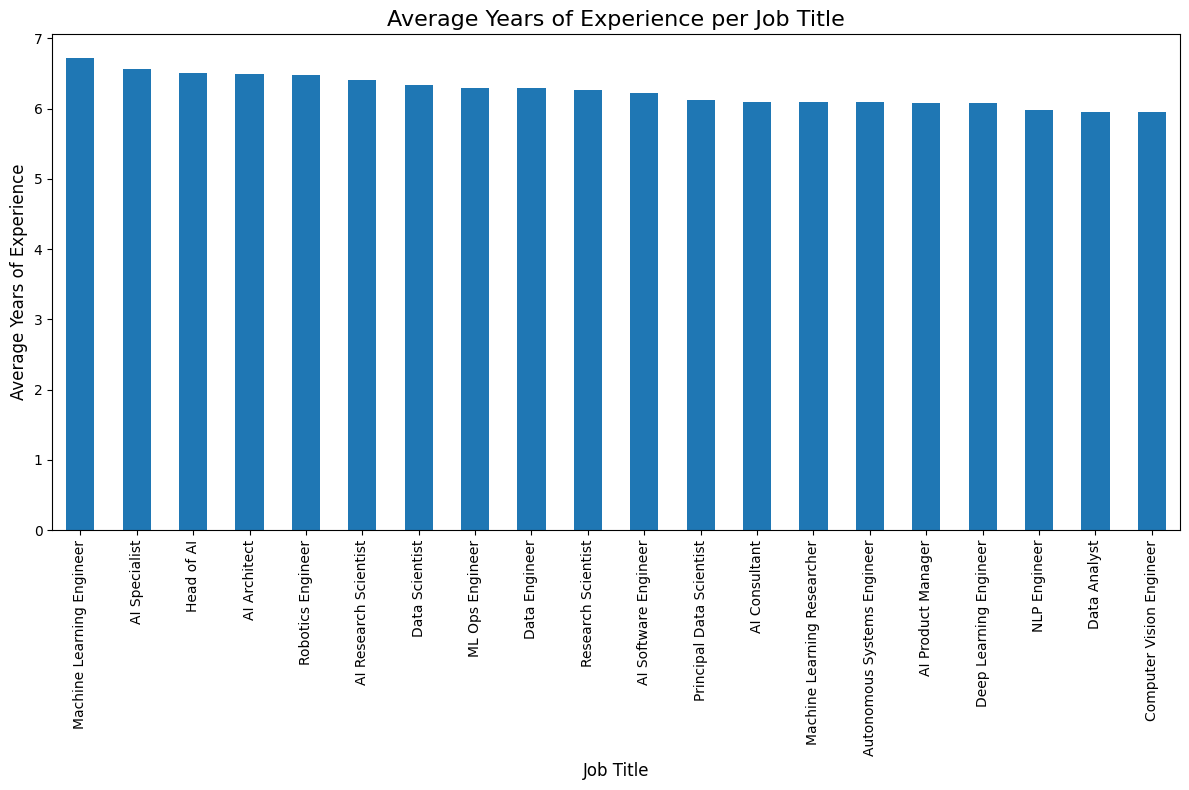

In [ ]:


# Convert 'years_experience' to numeric and calculate mean
df['years_experience'] = pd.to_numeric(df['years_experience'], errors='coerce')
avg_years_experience = df.groupby('job_title')['years_experience'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
avg_years_experience.plot(kind='bar')

# Add relevant components for a good graph
plt.title('Average Years of Experience per Job Title', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Average Years of Experience', fontsize=12)
plt.xticks(rotation=90) # Rotate job titles for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Display the plot
plt.show()

In [ ]:
#job title and industry

# Analyze the relationship between job_title and industry
job_industry_counts = df.groupby(['job_title', 'industry']).size().unstack(fill_value=0)

# Display the result
display(job_industry_counts)

industry,Automotive,Consulting,Education,Energy,Finance,Gaming,Government,Healthcare,Manufacturing,Media,Real Estate,Retail,Technology,Telecommunications,Transportation
job_title,,,,,,,,,,,,,,,
AI Architect,55,65,43,50,41,58,48,52,45,51,47,48,62,54,52
AI Consultant,53,53,56,52,38,51,45,43,43,43,47,45,45,49,41
AI Product Manager,53,54,37,57,53,42,47,36,47,55,52,58,57,54,41
AI Research Scientist,46,51,43,54,52,37,61,52,51,63,40,59,47,58,42
AI Software Engineer,53,65,53,38,55,50,53,50,56,57,56,47,54,47,50
AI Specialist,55,42,51,45,56,50,42,45,51,47,53,54,46,46,45
Autonomous Systems Engineer,45,58,46,57,49,48,55,56,52,58,60,56,52,43,42
Computer Vision Engineer,48,43,38,49,47,47,45,61,47,57,55,55,43,46,43
Data Analyst,47,52,47,55,48,49,55,47,43,53,56,51,60,46,50


Percentage of Job Postings by Industry:
industry
Retail                7.1%
Media                 7.0%
Automotive            6.8%
Consulting            6.8%
Technology            6.7%
Real Estate           6.7%
Government            6.7%
Transportation        6.6%
Telecommunications    6.6%
Healthcare            6.6%
Finance               6.6%
Energy                6.5%
Gaming                6.4%
Manufacturing         6.4%
Education             6.4%
Name: proportion, dtype: object


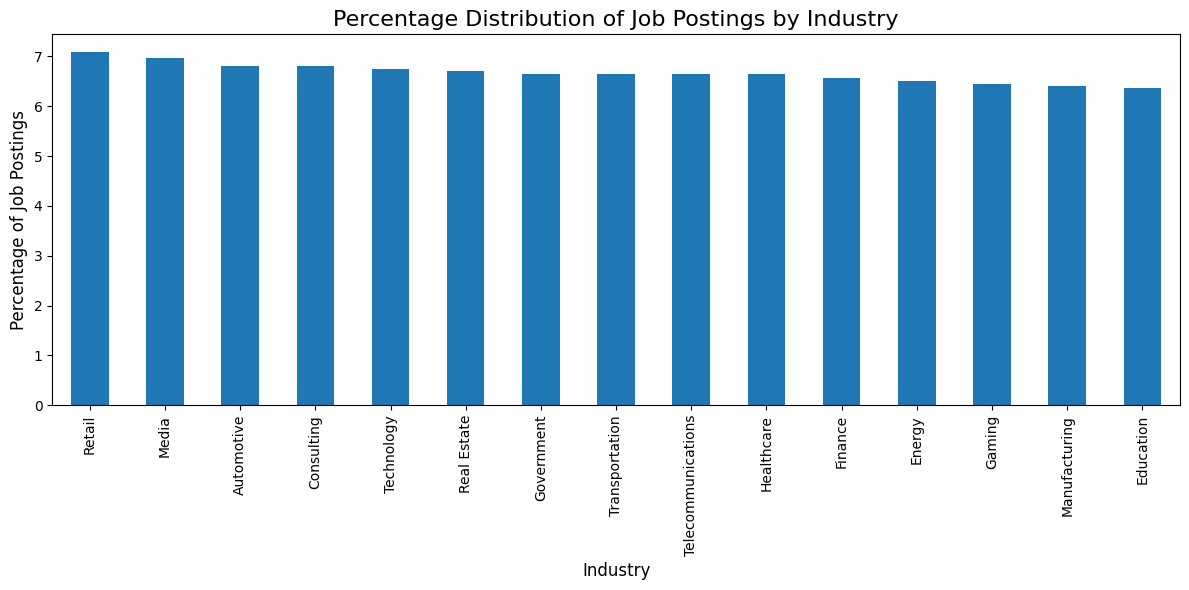

In [ ]:
# Count the occurrences of each industry and calculate percentages
industry_percentages = df['industry'].value_counts(normalize=True) * 100

# Display the result in percentage
print("Percentage of Job Postings by Industry:")
print(industry_percentages.apply(lambda x: f'{x:.1f}%'))

# Create a bar plot of industry percentages
plt.figure(figsize=(12, 6))
industry_percentages.plot(kind='bar')

plt.title('Percentage Distribution of Job Postings by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Percentage of Job Postings', fontsize=12)
plt.xticks(rotation=90) # Rotate industry names for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping

plt.show()

In [ ]:
# Get the list of unique industries
industries_list = df['industry'].unique().tolist()

# Display the list of industries
print("List of Industries:")
for industry in industries_list:
    print(industry)

List of Industries:
Automotive
Media
Education
Consulting
Healthcare
Gaming
Government
Telecommunications
Manufacturing
Energy
Technology
Real Estate
Finance
Transportation
Retail


In [ ]:
# Count the total number of unique companies
total_companies = df['company_name'].nunique()

print(f"The total number of companies in the study is: {total_companies}")

The total number of companies in the study is: 16


Distribution of Company Sizes:


,count
company_size,
S,5007
L,4998
M,4995


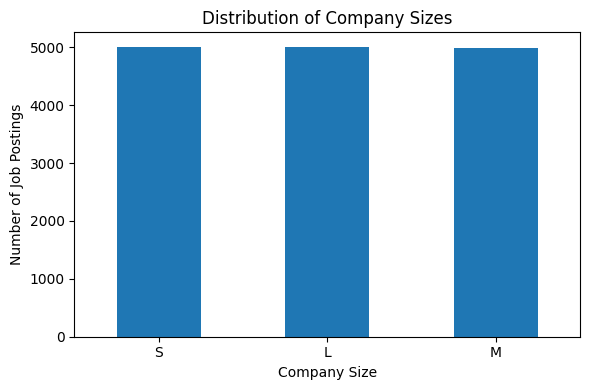

In [ ]:
# Get the distribution of company sizes
company_size_distribution = df['company_size'].value_counts()

# Display the distribution
print("Distribution of Company Sizes:")
display(company_size_distribution)

# Optional: Visualize the distribution with a bar plot
plt.figure(figsize=(6, 4))
company_size_distribution.plot(kind='bar')
plt.title('Distribution of Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Reasoning**:
The subtask requires converting the 'posting_date' and 'application_deadline' columns to datetime objects. This can be done using the `pd.to_datetime` function with `errors='coerce'` to handle non-parseable values.



In [ ]:
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')
df['application_deadline'] = pd.to_datetime(df['application_deadline'], errors='coerce')

**Reasoning**:
Calculate the difference between 'application_deadline' and 'posting_date' to get the duration for applications and store it in a new column.



In [ ]:
df['application_duration'] = df['application_deadline'] - df['posting_date']
display(df[['posting_date', 'application_deadline', 'application_duration']].head())

,posting_date,application_deadline,application_duration
1,2024-10-18,2024-11-07,20 days
2,2024-11-20,2025-01-11,52 days
3,2025-03-18,2025-04-07,20 days
4,2024-12-23,2025-02-24,63 days
5,2025-04-15,2025-06-23,69 days


**Reasoning**:
Extract the month and year from `posting_date`, calculate the number of postings per month/year, sort the results, and display the counts. Then, create a line plot to visualize the trend of job postings over time, add a title and labels, and display the plot.



Number of job postings per month and year:


,count
posting_month_year,
2024-01,953
2024-02,927
2024-03,932
2024-04,985
2024-05,955
2024-06,938
2024-07,959
2024-08,958
2024-09,895


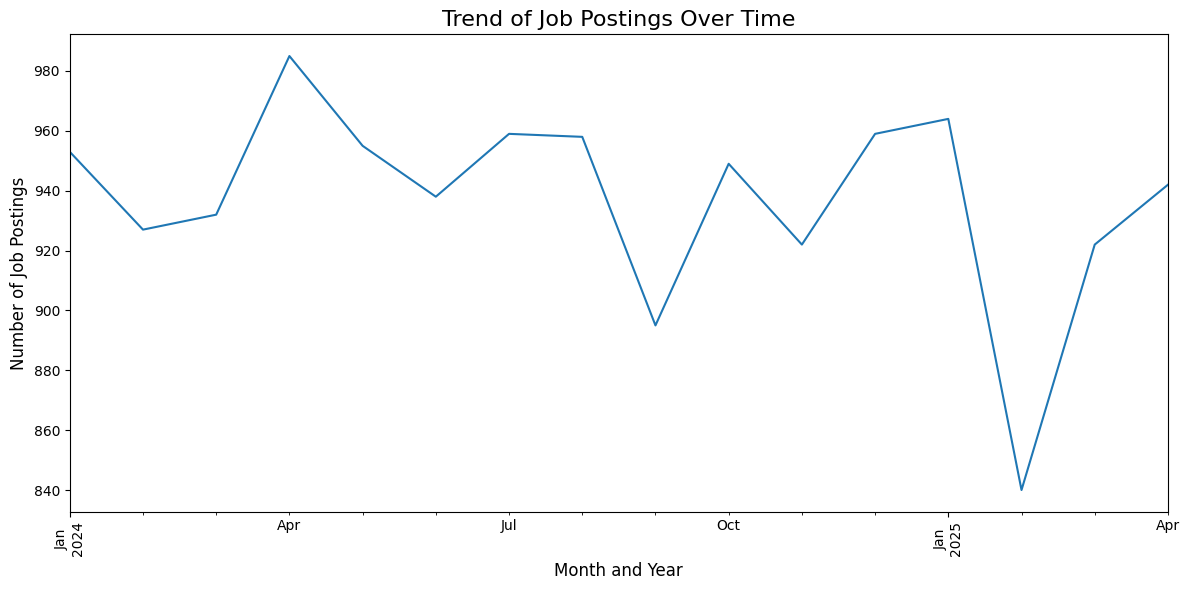

In [ ]:
df['posting_month_year'] = df['posting_date'].dt.to_period('M')
monthly_postings = df['posting_month_year'].value_counts().sort_index()
print("Number of job postings per month and year:")
display(monthly_postings)

plt.figure(figsize=(12, 6))
monthly_postings.plot(kind='line')
plt.title('Trend of Job Postings Over Time', fontsize=16)
plt.xlabel('Month and Year', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Analyze application duration

### Subtask:
Analyze the distribution of application durations (e.g., average duration, range).


**Reasoning**:
Calculate and display the descriptive statistics for the application duration.



In [ ]:
# Calculate descriptive statistics for application duration
duration_mean = df['application_duration'].mean()
duration_median = df['application_duration'].median()
duration_std = df['application_duration'].std()
duration_min = df['application_duration'].min()
duration_max = df['application_duration'].max()

# Display the results
print(f"Mean Application Duration: {duration_mean}")
print(f"Median Application Duration: {duration_median}")
print(f"Standard Deviation of Application Duration: {duration_std}")
print(f"Minimum Application Duration: {duration_min}")
print(f"Maximum Application Duration: {duration_max}")

Mean Application Duration: 43 days 13:06:31.680000
Median Application Duration: 44 days 00:00:00
Standard Deviation of Application Duration: 17 days 07:48:11.597864887
Minimum Application Duration: 14 days 00:00:00
Maximum Application Duration: 74 days 00:00:00


## Summary:

### Data Analysis Key Findings

*   The number of job postings per month shows a relatively stable trend between approximately 840 and 985 from January 2024 to April 2025.
*   The application duration, calculated as the difference between the application deadline and the posting date, has a mean of approximately 43 days and 13 hours.
*   The median application duration is 44 days.
*   The standard deviation of the application duration is approximately 17 days and 7 hours, indicating a moderate variability in the application periods.
*   The minimum application duration observed in the dataset is 14 days, while the maximum is 74 days.

### Insights or Next Steps

*   Further analysis could explore if there are seasonal trends or specific months with significantly higher or lower job postings.
*   Investigating the distribution of application durations graphically (e.g., using a histogram) would provide a clearer visual understanding of its shape and any potential outliers.


**Reasoning**:
Group the DataFrame by job_title and posting_month_year, count the occurrences, unstack the results, sort the columns, and display the DataFrame.



In [ ]:
df['posting_month_year'] = df['posting_date'].dt.to_period('M')
job_title_monthly_postings = df.groupby(['job_title', 'posting_month_year']).size().unstack(fill_value=0)
job_title_monthly_postings = job_title_monthly_postings.sort_index(axis=1)
print("Number of job postings per job title per month and year:")
display(job_title_monthly_postings)

Number of job postings per job title per month and year:


posting_month_year,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04
job_title,,,,,,,,,,,,,,,,
AI Architect,49,45,50,50,53,45,59,50,42,51,50,52,60,37,38,40
AI Consultant,35,43,47,39,41,44,46,45,54,42,44,39,54,41,36,54
AI Product Manager,58,52,52,40,55,33,46,51,42,53,43,53,43,27,52,43
AI Research Scientist,48,43,42,47,49,52,39,38,49,55,44,55,55,35,51,54
AI Software Engineer,60,54,44,62,42,49,48,40,37,49,48,67,49,50,54,31
AI Specialist,53,52,34,34,46,48,47,54,51,45,44,33,56,43,42,46
Autonomous Systems Engineer,53,40,50,46,56,54,36,48,37,58,45,50,39,56,52,57
Computer Vision Engineer,54,44,50,47,46,43,46,47,46,45,47,45,42,37,38,47
Data Analyst,41,44,55,49,52,41,47,50,59,53,44,45,45,40,44,50


**Reasoning**:
Calculate the average application duration for each job title and sort the results.



In [ ]:
average_duration_per_job_title = df.groupby('job_title')['application_duration'].mean().sort_values(ascending=False)
print("Average application duration per job title:")
display(average_duration_per_job_title)

Average application duration per job title:


,application_duration
job_title,
Robotics Engineer,45 days 03:24:54.071146245
Principal Data Scientist,44 days 04:54:16.675749319
Research Scientist,44 days 02:58:32.668463612
Deep Learning Engineer,44 days 01:18:13.036211699
AI Architect,44 days 00:26:08.871595330
Autonomous Systems Engineer,43 days 23:32:12.046332046
NLP Engineer,43 days 20:52:54.803149606
Computer Vision Engineer,43 days 18:00:00
Machine Learning Researcher,43 days 17:26:08.316831683


## Summary:

### Data Analysis Key Findings

*   The number of job postings for different job titles varied across months and years, as shown in the `job_title_monthly_postings` table.
*   The average application duration also varied by job title.
*   "Robotics Engineer" had the longest average application duration at over 45 days.
*   "Principal Data Scientist", "Research Scientist", "Deep Learning Engineer", and "AI Architect" also had relatively long average application durations, all exceeding 44 days.

### Insights or Next Steps

*   Investigate the reasons behind the longer application durations for specific job titles like "Robotics Engineer" and "Principal Data Scientist".
*   Analyze how application duration might correlate with other factors such as salary range or required experience level.
